ACTIVIDAD 1

ACTIVIDAD 2


In [166]:
  # IMPORTAMOS LAS BIBLIOTECAS QUE VAMOS A UTILIZAR
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt
  import seaborn as sns

  #Matplotlib mostrara los resultados en la Notebook Jupyter
  %matplotlib inline



In [118]:
# EN ESTA NUEVA JUPYTER NOTEBOOK, EN UNA CELDA VAMOS A CONCENTRAR TODAS LAS OPERACIONES 
# DE TRANSFORMACION DEL DATAFRAME ORIFINAL DF_DIST

# TOMAMOS LA DIRECCION URL DEL ARCHIVO EN FORMATO 'RAW'
url = "https://raw.githubusercontent.com/IsmaelEA2020/Fisica-computacional/main/Actividad%203/Climatolog%C3%ADa.txt" 

# DEFINIMOS EL NOMBRE DE LAS COLUMNAS 
my_cols = ["Fecha","Precipitación","Evaporación","Tmax","Tmin"]
df_dist = pd.read_csv(url, names=my_cols,encoding="cp1251", sep="\s+", header=None, skiprows=19, skipfooter=1, engine='python')
  # PROCEDEREMOS A CREAR HISTOGRAMAS DE NUESTROS DATOS  
  # UTILIZAMOS matplotlib

# HACEMOS UNA COPIA DE TRABAJO Y PRESERVAMOS EL DATAFRAME ORIGINAL
df_work0 = df_dist.copy()

# REMPLAZAMOS LOS TEXTOS 'NULO' POR UN ESPACIO EN BLANCO ''
str_Nulo = 'Nulo'
df_work1 = df_work0.replace(to_replace=str_Nulo, value='', regex=True)

# DESEAMOS CONVERTIR LOS VALORES DE LAS VARIABLES AMBIENTALES A NUMEROS FLOTANTES
cols_list = ["Fecha","Precipitación","Evaporación","Tmax","Tmin"]
for cols in cols_list:
  df_work1[cols] = pd.to_numeric(df_work1[cols], errors='coerce')
  # VOLVEMOS A HACER UNA PAUSA Y DEFINIMOS UN NUEVO DATAFRAME POR SI HAY QUE REPRESARSE
  df_work2 = df_work1.copy()

  # AGREGAMOS LA OPCION QUE EL PRIMER DATO ES EL DIA (dayfirst=True)
df_work2['Fecha']=pd.to_datetime(df_work2['Fecha'], dayfirst=True).copy()

# USAREMOS LA FUNCION .dt.year y dt.month PARA EXTRAER EL AÑO Y MES DE FECHA
df_work2['Año'] = df_work2['Fecha'].dt.year
df_work2['Mes'] = df_work2['Fecha'].dt.month

  # DEFINIMOS UN NUEVO DATAFRAME PARA EL ANALISIS DE LOS DATOS METEOROLOGICOS
  # SERA NUESTRO NUEVO PUNTO DE PARTIDA.
df_meteo = df_work2.copy()
df_meteo.info()
print(df_meteo.head())
print(df_meteo.tail())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3436 entries, 0 to 3435
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Fecha          0 non-null      datetime64[ns]
 1   Precipitación  3436 non-null   float64       
 2   Evaporación    3425 non-null   float64       
 3   Tmax           3436 non-null   float64       
 4   Tmin           3436 non-null   float64       
 5   Año            0 non-null      float64       
 6   Mes            0 non-null      float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 188.0 KB
  Fecha  Precipitación  Evaporación  Tmax  Tmin  Año  Mes
0   NaT            0.0          4.2  29.0  11.5  NaN  NaN
1   NaT            0.0          3.6  28.0  11.5  NaN  NaN
2   NaT            0.0          4.7  29.5  14.5  NaN  NaN
3   NaT            0.0          3.8  30.0  11.0  NaN  NaN
4   NaT            0.0          3.8  29.5  13.5  NaN  NaN
     Fecha  Precipitación 

REALIZACIÓN DE LOS HISTOGRAMAS

Text(0.5, 1.0, 'Distribición de precipitación de Guamúchil')

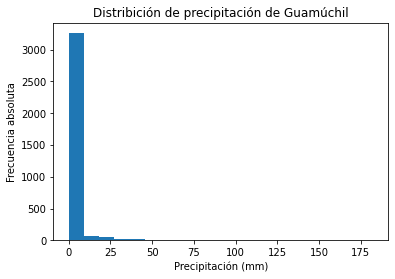

In [53]:
 #PROCEDEMOS A LA ELABORACION DEL HISTOGRAMA
 plt.hist(df_meteo.Precipitación, bins=20)
 plt.xlabel('Precipitación (mm)')
 plt.ylabel('Frecuencia absoluta')
 plt.title('Distribición de precipitación de Guamúchil')

Text(0.5, 1.0, 'Distribición de precipitación de Guamúchil')

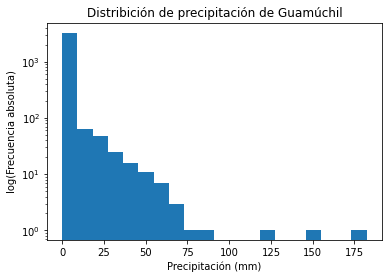

In [52]:
 #PROCEDEMOS A LA ELABORACION DEL HISTOGRAMA
 plt.hist(df_meteo.Precipitación, bins=20)
 plt.yscale('log')
 plt.xlabel('Precipitación (mm)')
 plt.ylabel('log(Frecuencia absoluta)')
 plt.title('Distribición de precipitación de Guamúchil')

UTILIZAMOS LA BIBILIOTECA DE SEABORN

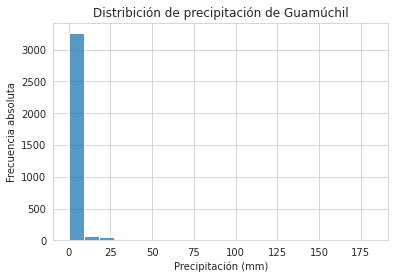

In [57]:
# MISMA GRAFICA UTILIZANDO LA BIBLIOTECA DE SEABORN
sns.set_style('whitegrid')
plt.xlabel('Precipitación (mm)')
plt.ylabel('Frecuencia absoluta')
plt.title('Distribición de precipitación de Guamúchil')
sns.histplot(data=df_meteo, x='Precipitación', bins=20);

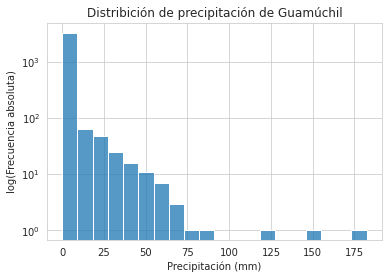

In [60]:
# REPETIMOS LA MISMA GRAFICA UTILIZANDO LA ESCALA LOGARITMICA SOLO EN EL EJE Y
sns.set_style('whitegrid')
plt.xlabel('Precipitación (mm)')
plt.ylabel('log(Frecuencia absoluta)')
plt.title('Distribición de precipitación de Guamúchil')
sns.histplot(data=df_meteo, x='Precipitación', bins=20, log_scale=(False,True));

GRÁFICAS DE EVAPORACIÓN 

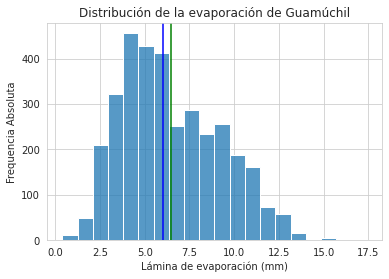

In [110]:
# AHORA GRAFICAMOS LA EVAPORACION
sns.set_style('whitegrid')

# DEFINIMOS LAS CANTIDADES ESPECIFICAS: PROMEDIO Y MEDIANA
Ev_med = df_meteo.Evaporación.median()
Ev_prom = df_meteo.Evaporación.mean()

sns.histplot(data=df_meteo, x='Evaporación', bins=20);
# LINEAS VERTICALES UBICADAS UBICADAS EN LA MEDIANA Y PROMEDIO
plt.axvline(x = Ev_med, color = 'b', label = 'm')
plt.axvline(x = Ev_prom, color = 'g', label = 'x')

plt.xlabel('Lámina de evaporación (mm)')
plt.ylabel('Frecuencia Absoluta')
plt.title('Distribución de la evaporación de Guamúchil')

plt.show()


Text(0.5, 1.0, 'Evaporación de Guamúchil')

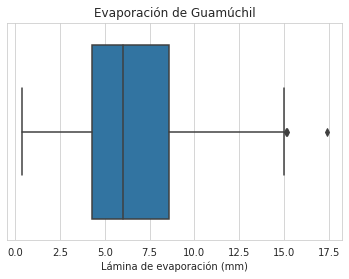

In [156]:
#GRAFICAS DE CAJAS (BOXPLOTS) UTILIZANDO LA BIBILOTECA SEABORN
sns.set_style('whitegrid')

sns.boxplot(x=df_meteo.Evaporación, data=df_meteo, orient='h').set(xlabel='Lámina de evaporación (mm)')
plt.title('Evaporación de Guamúchil')

GRÁFICAS DE TEMPERATURAS MÁXIMAS

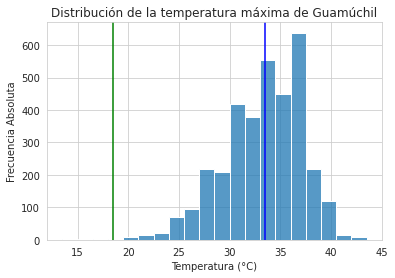

In [147]:
# AHORA GRAFICAMOS LAS TEMPERATURAS MAXIMAS
sns.set_style('whitegrid')

# DEFINIMOS LAS CANTIDADES ESPECIFICAS: PROMEDIO Y MEDIANA
Tmed = df_meteo.Tmax.median()
Tprom = df_meteo.Tmin.mean()

sns.histplot(data=df_meteo, x='Tmax', bins=20);
# LINEAS VERTICALES UBICADAS UBICADAS EN LA MEDIANA Y PROMEDIO
plt.axvline(x = Tmed, color = 'b', label = 'm')
plt.axvline(x = Tprom, color = 'g', label = 'x')

plt.xlabel('Temperatura (°C)')
plt.ylabel('Frecuencia Absoluta')
plt.title('Distribución de la temperatura máxima de Guamúchil')

plt.show()

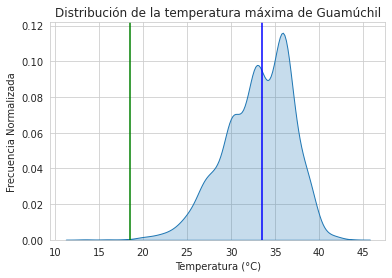

In [148]:
# REALIZAMOS GRAFICA DE  KDE (KERNEL DESTINY ESTIMATE) O GRAFIA DE LA FUNCION DE DENSIDAD
sns.set_style('whitegrid')

sns.kdeplot(df_meteo.Tmax, fill=True);
# LINEAS VERTICALES UBICADAS UBICADAS EN LA MEDIANA Y PROMEDIO
plt.axvline(Tmed, color = 'b')
plt.axvline(Tprom, color = 'g')

plt.xlabel('Temperatura (°C)')
plt.ylabel('Frecuencia Normalizada')
plt.title('Distribución de la temperatura máxima de Guamúchil')

plt.show()

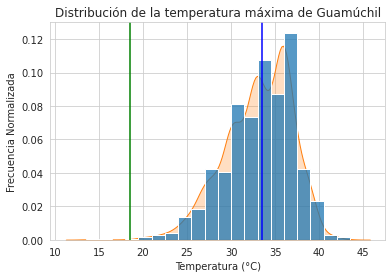

In [149]:
# Sobreponemos ambas
sns.histplot(data=df_meteo, x='Tmax', bins=20, stat='density')
sns.kdeplot(df_meteo.Tmax,fill=True);

plt.axvline(Tmed, color = 'b')
plt.axvline(Tprom, color = 'g')

plt.xlabel('Temperatura (°C)')
plt.ylabel('Frecuencia Normalizada')
plt.title('Distribución de la temperatura máxima de Guamúchil')

plt.show()

Text(0.5, 1.0, 'temperatura máxima de Guamúchil')

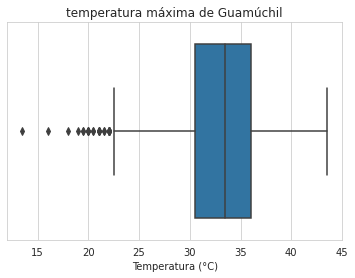

In [151]:
#GRAFICAS DE CAJAS (BOXPLOTS) UTILIZANDO LA BIBILOTECA SEABORN
sns.set_style('whitegrid')

sns.boxplot(x=df_meteo.Tmax, data=df_meteo, orient='h').set(xlabel='Temperatura (°C)')
plt.title('temperatura máxima de Guamúchil')

In [ ]:
GRÁFICAS DE TEMPERATURAS MÍNIMAS

Text(0.5, 1.0, 'temperatura mínima de Guamúchil')

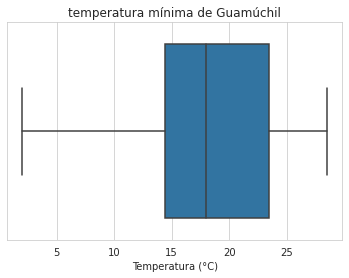

In [153]:
#GRAFICAS DE CAJAS (BOXPLOTS) UTILIZANDO LA BIBILOTECA SEABORN
sns.set_style('whitegrid')

sns.boxplot(x=df_meteo.Tmin, data=df_meteo, orient='h').set(xlabel='Temperatura (°C)')
plt.title('Temperatura mínima de Guamúchil')

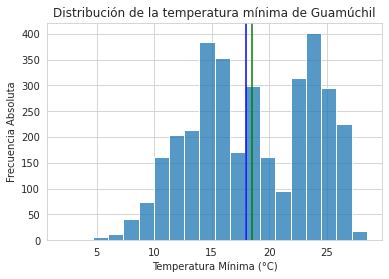

In [154]:
# AHORA GRAFICAMOS LAS TEMPERATURAS MÍNIMAS
sns.set_style('whitegrid')

# DEFINIMOS LAS CANTIDADES ESPECIFICAS: PROMEDIO Y MEDIANA
Tmed = df_meteo.Tmin.median()
Tprom = df_meteo.Tmin.mean()

sns.histplot(data=df_meteo, x='Tmin', bins=20);
plt.axvline(Tmed, color = 'b');
plt.axvline(Tprom, color = 'g');

plt.xlabel('Temperatura Mínima (°C)')
plt.ylabel('Frecuencia Absoluta')
plt.title('Distribución de la temperatura mínima de Guamúchil')

plt.show()

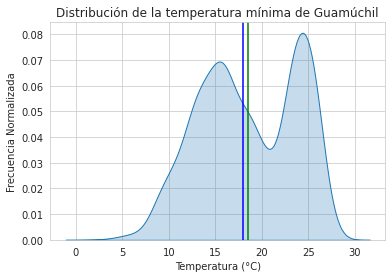

In [137]:
# REALIZAMOS GRAFICA DE  KDE (KERNEL DESTINY ESTIMATE) O GRAFIA DE LA FUNCION DE DENSIDAD
sns.set_style('whitegrid')

sns.kdeplot(df_meteo.Tmin, fill=True);
# LINEAS VERTICALES UBICADAS UBICADAS EN LA MEDIANA Y PROMEDIO
plt.axvline(Tmed, color = 'b')
plt.axvline(Tprom, color = 'g')

plt.xlabel('Temperatura (°C)')
plt.ylabel('Frecuencia Normalizada')
plt.title('Distribución de la temperatura mínima de Guamúchil')

plt.show()

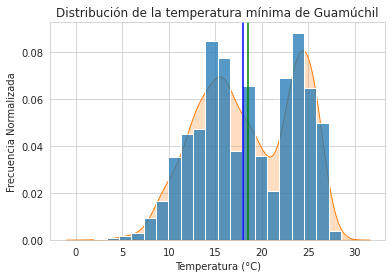

In [140]:
# Sobreponemos ambas
sns.histplot(data=df_meteo, x='Tmin', bins=20, stat='density')
sns.kdeplot(df_meteo.Tmin,fill=True);

plt.axvline(Tmed, color = 'b')
plt.axvline(Tprom, color = 'g')

plt.xlabel('Temperatura (°C)')
plt.ylabel('Frecuencia Normalizada')
plt.title('Distribución de la temperatura mínima de Guamúchil')

plt.show()

ACTIVIDAD 3

Text(0.5, 1.0, 'Evaporación de Guamúchil')

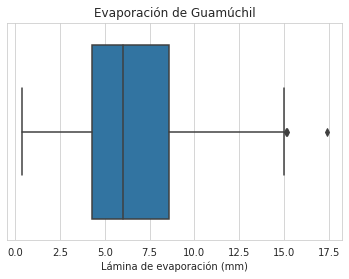

In [157]:
#GRAFICAS DE CAJAS (BOXPLOTS) UTILIZANDO LA BIBILOTECA SEABORN
sns.set_style('whitegrid')

sns.boxplot(x=df_meteo.Evaporación, data=df_meteo, orient='h').set(xlabel='Lámina de evaporación (mm)')
plt.title('Evaporación de Guamúchil')

Text(0.5, 1.0, 'temperatura máxima de Guamúchil')

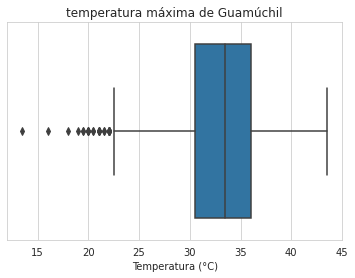

In [158]:
#GRAFICAS DE CAJAS (BOXPLOTS) UTILIZANDO LA BIBILOTECA SEABORN
sns.set_style('whitegrid')

sns.boxplot(x=df_meteo.Tmax, data=df_meteo, orient='h').set(xlabel='Temperatura (°C)')
plt.title('temperatura máxima de Guamúchil')

Text(0.5, 1.0, 'Temperatura mínima de Guamúchil')

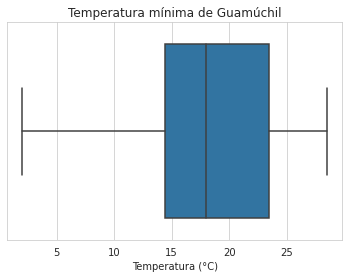

In [159]:
#GRAFICAS DE CAJAS (BOXPLOTS) UTILIZANDO LA BIBILOTECA SEABORN
sns.set_style('whitegrid')

sns.boxplot(x=df_meteo.Tmin, data=df_meteo, orient='h').set(xlabel='Temperatura (°C)')
plt.title('Temperatura mínima de Guamúchil')

ACTIVIDAD 4

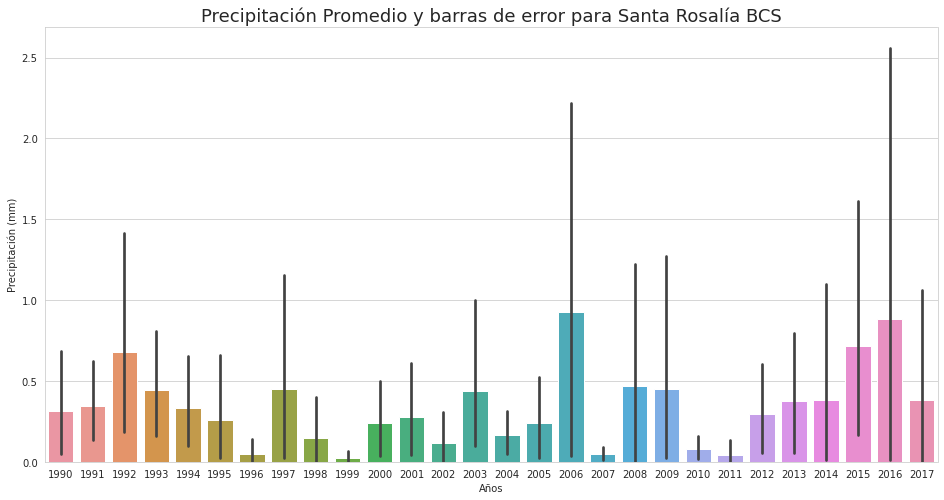

In [ ]:
# Gráfica de Precipitación últimos 30 años
# Agrupada por Año
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.barplot(x='Año', y='Precip', data=df_90);
# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Guamúchil', fontsize=18)

plt.show()


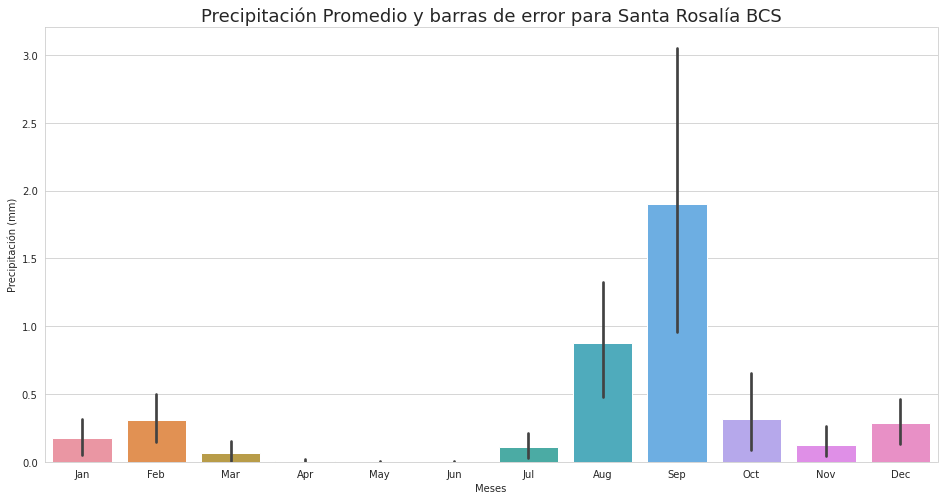

In [ ]:
# Gráfica de Precipitación últimos 30 años
# Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.barplot(x='Mes', y='Precip', data=df_90);
# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Guamúchil', fontsize=18)

plt.show()


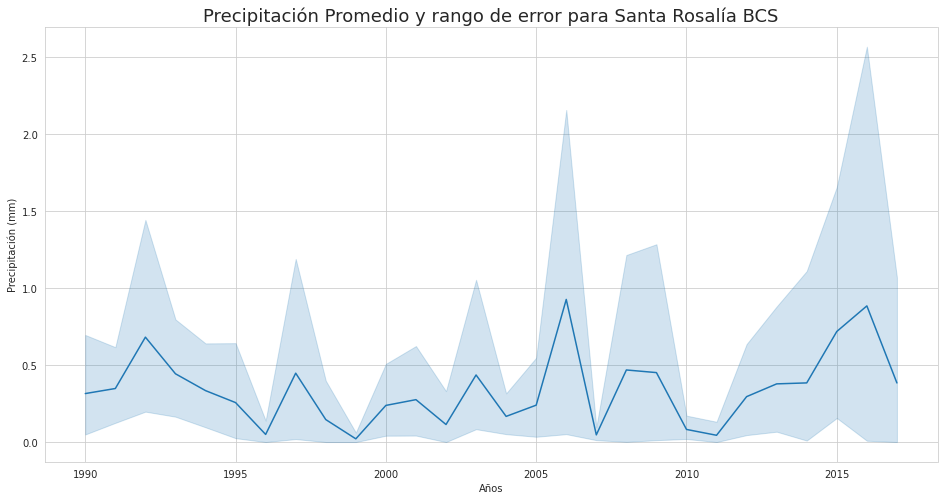

In [ ]:
# Gráfica de Precipitación últimos 30 años
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.lineplot(x='Año', y='Precip', data=df_90);

# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y rango de error para Guamúchil', fontsize=18)

plt.show()


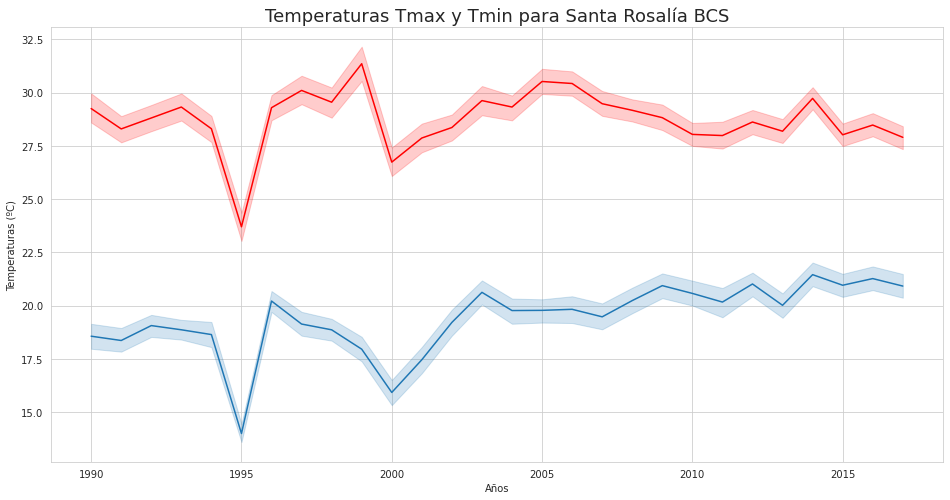

In [ ]:
# Gráfica de Temperaturas de últimos 30 años
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

sns.lineplot(x='Año', y='Tmax', data=df_90, color='r');
sns.lineplot(x='Año', y='Tmin', data=df_90);

plt.xlabel('Años')
plt.ylabel('Temperaturas (ºC)')
plt.title('Temperaturas Tmax y Tmin para Guamúchil', fontsize=18)

plt.show()


ACTIVIDAD 6

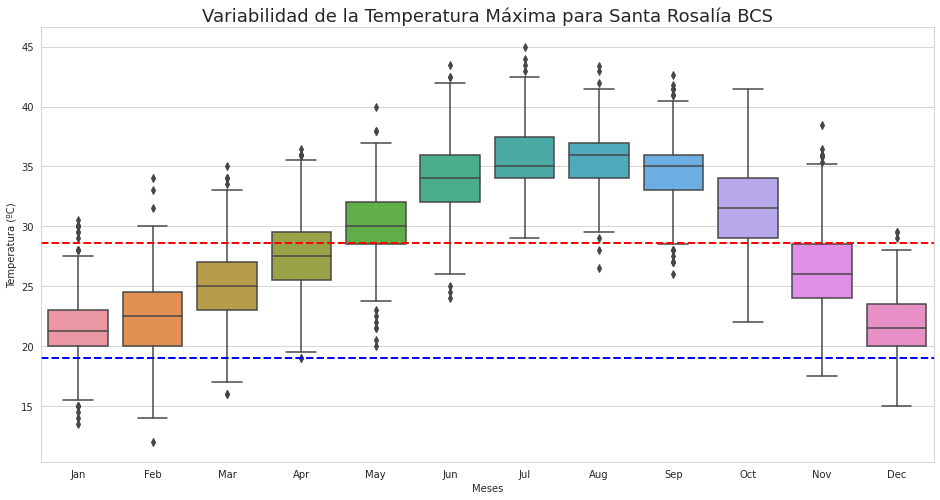

mean(Tmax) =  28.61092420011439
mean(Tmin) =  19.002987484860725
Diff Tmax_ave-Tmin_ave =  9.607936715253665


In [ ]:
# Gráfica de Temepraturas Máximas en los últimos 30 años
# Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

# Promedio de Tmax y Tmin
Tmax_ave = df_meteo.Tmax.mean()
Tmin_ave = df_meteo.Tmin.mean()

# Gráfica de cajas de la Temperatura 
g=sns.boxplot(x='Mes', y='Tmax', data=df_90);
# Linea de Tmax promedio 
plt.axhline(Tmax_ave, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmin_ave, color = 'b', linestyle='--', linewidth=2);

# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Temperatura (ºC)')
plt.title('Variabilidad de la Temperatura Máxima para Guamúchil', fontsize=18)

plt.show()

# Imprimir información de Temperaturas
print('mean(Tmax) = ', Tmax_ave)
print('mean(Tmin) = ', Tmin_ave)
print('Diff Tmax_ave-Tmin_ave = ', (Tmax_ave - Tmin_ave))


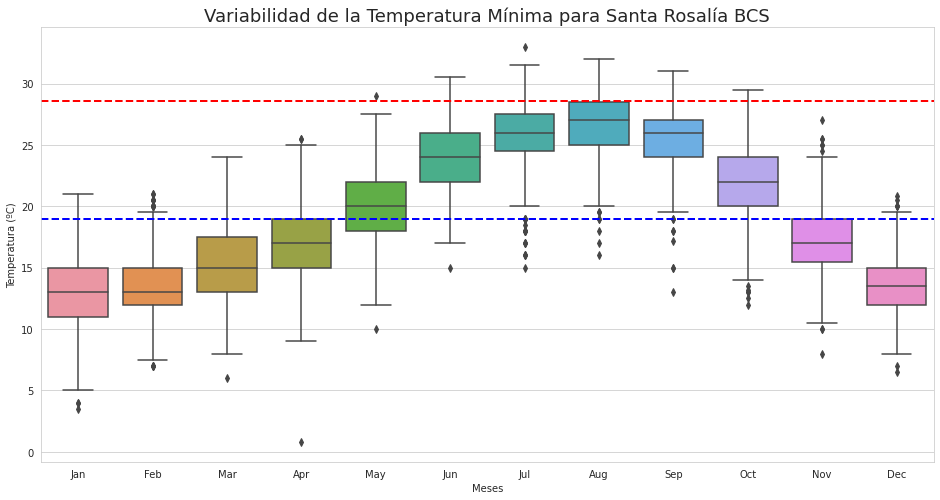

mean(Tmax) =  28.61092420011439
mean(Tmin) =  19.002987484860725


In [ ]:
# Gráfica de Temperaturas Mínimas en los últimos 30 años
# Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

# Promedio de Tmax y Tmin
Tmax_ave = df_meteo.Tmax.mean()
Tmin_ave = df_meteo.Tmin.mean()

# Gráfica de cajas de la Temperatura 
g=sns.boxplot(x='Mes', y='Tmin', data=df_90);
# Linea de Tmin promedio 
plt.axhline(Tmax_ave, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmin_ave, color = 'b', linestyle='--', linewidth=2);

# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Temperatura (ºC)')
plt.title('Variabilidad de la Temperatura Mínima para Guamúchil', fontsize=18)

plt.show()

# Imprimir información de Temperaturas
print('mean(Tmax) = ', Tmax_ave)
print('mean(Tmin) = ', Tmin_ave)
print('Diff Tmax_ave-Tmin_ave = ', (Tmax_ave - Tmin_ave))


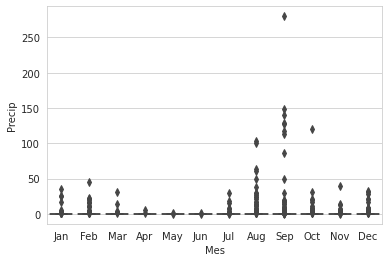

In [ ]:
# La gráfica de Boxplot no brinda información de la Precipitación por mes
sns.boxplot(x='Mes' , y='Precip', data=df_90);